**done remotely on greenplanet**

In [1]:
import numpy
import gdal
import osr
import glob
import xarray
import datetime
import re
import cartopy
import cmocean
import matplotlib.pyplot as mp
import scipy.stats
import netCDF4
import pandas

import dask

mp.rcParams.update({'mathtext.default': 'regular'})

open all files as a separate gdal dataset

* store ALL FILES in a list called ```file_list_datetime_all``` (for MOD11A2 size~27,000(
* store all yearday strings in a list called ```file_list_yearday_strings_all```

In [2]:
!ls DATA_nc/*LST_day*.nc

DATA_nc/MOD11A2_LST_day_2000.nc  DATA_nc/MOD11A2_LST_day_2010.nc
DATA_nc/MOD11A2_LST_day_2001.nc  DATA_nc/MOD11A2_LST_day_2011.nc
DATA_nc/MOD11A2_LST_day_2002.nc  DATA_nc/MOD11A2_LST_day_2012.nc
DATA_nc/MOD11A2_LST_day_2003.nc  DATA_nc/MOD11A2_LST_day_2013.nc
DATA_nc/MOD11A2_LST_day_2004.nc  DATA_nc/MOD11A2_LST_day_2014.nc
DATA_nc/MOD11A2_LST_day_2005.nc  DATA_nc/MOD11A2_LST_day_2015.nc
DATA_nc/MOD11A2_LST_day_2006.nc  DATA_nc/MOD11A2_LST_day_2016.nc
DATA_nc/MOD11A2_LST_day_2007.nc  DATA_nc/MOD11A2_LST_day_2017.nc
DATA_nc/MOD11A2_LST_day_2008.nc  DATA_nc/MOD11A2_LST_day_2018.nc
DATA_nc/MOD11A2_LST_day_2009.nc


In [3]:
#data_filenames = sorted(glob.glob('*DATA.npy'))
#datetime_filenames = sorted(glob.glob('*TIMES.npy'))

# for daytime lst

subset southwest part of Borneo using this syntax:

```
lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2200,3250))
```

In [4]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_day*', chunks={'lat':100,'lon':100}, parallel=True)#, decode_times=False)
lst_day = data_mfds['LST_day']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [5]:
import dask.diagnostics

In [6]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
#lst_day_borneo = lst_day.isel(lat=slice(750,1750), lon=slice(2225,3225))
lst_day_borneo1 = lst_day.isel(lat=slice(900,1100), lon=slice(2400,2700))
lst_day_borneo2 = lst_day.isel(lat=slice(1400,1600), lon=slice(2350,2550))

[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  0.1s


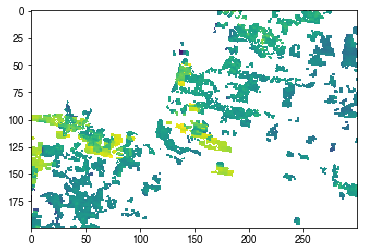

In [9]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo1.isel(time=400), origin='upper')

[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  0.1s


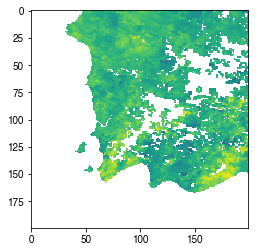

In [8]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo2.isel(time=110), origin='upper')

[###########################             ] | 68% Completed | 21.1s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 29.7s
[########################################] | 100% Completed |  0.1s


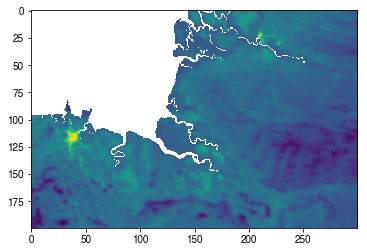

In [10]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo1.mean(dim='time').values, origin='upper')

[###########################             ] | 68% Completed | 20.9s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[############################            ] | 70% Completed | 21.4s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 29.7s
[########################################] | 100% Completed |  0.1s


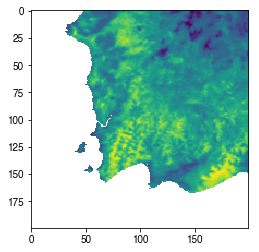

In [11]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo2.mean(dim='time').values, origin='upper')

In [12]:
#lst_day_borneo_values = lst_day_borneo.values
with dask.diagnostics.ProgressBar():
    lst_day_borneo1_values = lst_day_borneo1.values
    lst_day_borneo2_values = lst_day_borneo2.values

#mask = ~numpy.isnan(lst_day_borneo_values)
mask = ~numpy.isnan(lst_day_borneo1_values)
mask = ~numpy.isnan(lst_day_borneo2_values)

lst_day_borneo1_areamean = numpy.nanmean(lst_day_borneo1_values, axis=(1,2))
lst_day_borneo2_areamean = numpy.nanmean(lst_day_borneo2_values, axis=(1,2))

[########################################] | 100% Completed | 29.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed | 29.3s
[########################################] | 100% Completed |  0.1s


Text(0,1.02,'land surface temperature')

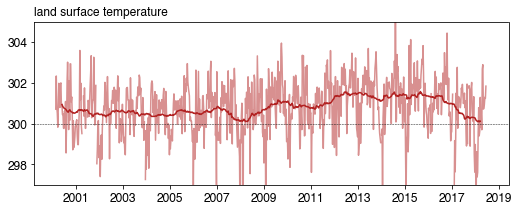

In [15]:
plot_this = lst_day_borneo1_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)


Text(0,1.02,'land surface temperature')

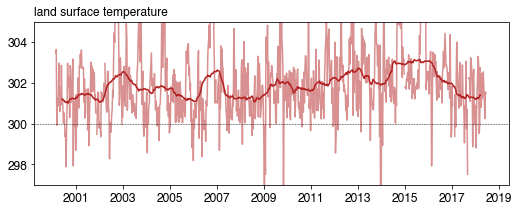

In [16]:
plot_this = lst_day_borneo2_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)

# for nighttime lst

In [17]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_night*', chunks={'lat':100,'lon':100}, parallel=True, decode_times=False)
lst_night = data_mfds['LST_night']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [22]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
#lst_night_borneo = lst_night.isel(lat=slice(750,1750), lon=slice(2225,3225))
lst_night_borneo1 = lst_night.isel(lat=slice(900,1100), lon=slice(2400,2700))
lst_night_borneo2 = lst_night.isel(lat=slice(1400,1600), lon=slice(2350,2550))

In [ ]:
#lst_night_borneo_values = lst_night_borneo.values
with dask.diagnostics.ProgressBar():
    lst_night_borneo1_values = lst_night_borneo1.values
    lst_night_borneo2_values = lst_night_borneo2.values

#mask = ~numpy.isnan(lst_night_borneo_values)
mask = ~numpy.isnan(lst_night_borneo1_values)
mask = ~numpy.isnan(lst_night_borneo2_values)

lst_night_borneo1_areamean = numpy.nanmean(lst_night_borneo1_values, axis=(1,2))
lst_night_borneo2_areamean = numpy.nanmean(lst_night_borneo2_values, axis=(1,2))

[########################################] | 100% Completed |  8min 53.8s
[########################################] | 100% Completed |  0.1s
[##################################      ] | 86% Completed |  8min  2.6s

In [ ]:
plot_this = lst_night_borneo1_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)


In [ ]:
plot_this = lst_night_borneo2_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)
